In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import os

In [32]:
df=pd.read_csv('bhagavad-gita.csv')
df

,Unnamed: 0,title,devanagari,verse_text,verse_text_no_samdhis
0,0,1.10,धृतराष्ट्र उवाच ।\r\nधर्मक्षेत्रे कुरुक्षेत्रे...,dhṛtarāṣṭra uvāca\r\ndharma-kṣetre kuru-kṣetre...,dhṛtarāṣṭraḥ uvāca dharma kṣetre kuru kṣetre s...
1,1,1.20,सञ्जय उवाच ।\r\nदृष्ट्वा तु पाण्डवानीकं व्यूढं...,sañjaya uvāca\r\ndṛṣṭvā tu pāṇḍavānīkaṁ\r\nvyū...,sañjayaḥ uvāca dṛṣṭvā tu pāṇḍava anīkam vyūḍha...
2,2,1.30,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।\r...,paśyaitāṁ pāṇḍu-putrānām\r\nācārya mahatīṁ cam...,paśya etām pāṇḍu putrānām ācārya mahatīm camūm...
3,3,1.40,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि ।\r\nयुय...,atra śūrā maheṣv-āsā\r\nbhīmārjuna-samā yudhi\...,atra śūrāḥ mahā iṣu āsāḥ bhīma arjuna samāḥ yu...
4,4,1.50,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् ।\r\n...,dhṛṣṭaketuś cekitānaḥ\r\nkāśirājaś ca vīryavān...,dhṛṣṭaketuḥ cekitānaḥ kāśirājaḥ ca vīrya vān p...
...,...,...,...,...,...
695,695,18.74,संजय उवाच ।\r\nइत्यहं वासुदेवस्य पार्थस्य च मह...,sañjaya uvāca\r\nity ahaṁ vāsudevasya\r\npārth...,sañjayaḥ uvāca iti aham vāsudevasya pārthasya ...
696,696,18.75,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम् ।\r\nय...,vyāsa-prasādāc chrutavān\r\netad guhyam ahaṁ p...,vyāsa prasādāt śrutavān etat guhyam aham param...
697,697,18.76,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम् ।\r\...,rājan saṁsmṛtya saṁsmṛtya\r\nsaṁvādam imam adb...,rājan saṁsmṛtya saṁsmṛtya saṁvādam imam adbhut...
698,698,18.77,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः ।\...,tac ca saṁsmṛtya saṁsmṛtya\r\nrūpam aty-adbhut...,tat ca saṁsmṛtya saṁsmṛtya rūpam ati adbhutam ...


In [33]:
df.drop(df.columns[[0]],axis=1,inplace=True)
df

,title,devanagari,verse_text,verse_text_no_samdhis
0,1.10,धृतराष्ट्र उवाच ।\r\nधर्मक्षेत्रे कुरुक्षेत्रे...,dhṛtarāṣṭra uvāca\r\ndharma-kṣetre kuru-kṣetre...,dhṛtarāṣṭraḥ uvāca dharma kṣetre kuru kṣetre s...
1,1.20,सञ्जय उवाच ।\r\nदृष्ट्वा तु पाण्डवानीकं व्यूढं...,sañjaya uvāca\r\ndṛṣṭvā tu pāṇḍavānīkaṁ\r\nvyū...,sañjayaḥ uvāca dṛṣṭvā tu pāṇḍava anīkam vyūḍha...
2,1.30,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।\r...,paśyaitāṁ pāṇḍu-putrānām\r\nācārya mahatīṁ cam...,paśya etām pāṇḍu putrānām ācārya mahatīm camūm...
3,1.40,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि ।\r\nयुय...,atra śūrā maheṣv-āsā\r\nbhīmārjuna-samā yudhi\...,atra śūrāḥ mahā iṣu āsāḥ bhīma arjuna samāḥ yu...
4,1.50,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् ।\r\n...,dhṛṣṭaketuś cekitānaḥ\r\nkāśirājaś ca vīryavān...,dhṛṣṭaketuḥ cekitānaḥ kāśirājaḥ ca vīrya vān p...
...,...,...,...,...
695,18.74,संजय उवाच ।\r\nइत्यहं वासुदेवस्य पार्थस्य च मह...,sañjaya uvāca\r\nity ahaṁ vāsudevasya\r\npārth...,sañjayaḥ uvāca iti aham vāsudevasya pārthasya ...
696,18.75,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम् ।\r\nय...,vyāsa-prasādāc chrutavān\r\netad guhyam ahaṁ p...,vyāsa prasādāt śrutavān etat guhyam aham param...
697,18.76,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम् ।\r\...,rājan saṁsmṛtya saṁsmṛtya\r\nsaṁvādam imam adb...,rājan saṁsmṛtya saṁsmṛtya saṁvādam imam adbhut...
698,18.77,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः ।\...,tac ca saṁsmṛtya saṁsmṛtya\r\nrūpam aty-adbhut...,tat ca saṁsmṛtya saṁsmṛtya rūpam ati adbhutam ...


In [11]:
df.dtypes

title                    float64
devanagari                object
verse_text                object
verse_text_no_samdhis     object
dtype: object

In [12]:
#get some stats on data 
df.describe()

,title
count,700.000000
mean,9.359071
std,5.593784
min,1.100000
25%,4.217500
50%,9.205000
75%,14.102500
max,18.900000


In [15]:
title_no=df['title'].astype(int)
list_count=title_no.value_counts()

In [20]:
list_count

18    78
2     72
11    55
6     47
1     46
3     43
4     42
10    42
13    35
9     34
7     30
5     29
8     28
17    28
14    27
16    24
12    20
15    20
Name: title, dtype: int64

In [16]:
list_count.dtype

dtype('int64')

In [17]:
list_count.sum()

700

In [18]:
list_count.describe()

count    18.000000
mean     38.888889
std      16.391852
min      20.000000
25%      28.000000
50%      34.500000
75%      45.250000
max      78.000000
Name: title, dtype: float64

In Bhagavad Gita (from above anlaysis):
It has a total of 18 chapters.
On an average there are 38 verses in a chapter.
There are a total of 700 verses in it.
Least number of verses are 20 in a any chapter.
Maximun number of verses are 78 in a chapter.

/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


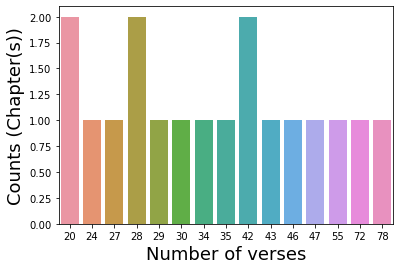

In [19]:
#data Visualization 

sns.countplot(list_count)
plt.xlabel("Number of verses", fontsize=18)
plt.ylabel("Counts (Chapter(s))", fontsize=18)

# Displaying the plot
plt.show()


There are two chapters with 20 number of verses in them, another two chapters have 28 number of verses and two more chapters which has 42 numbers of verses in it. Rest of the chapters have distinct number of verses in them.

/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


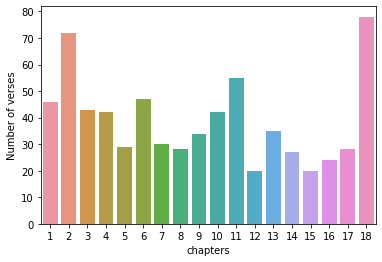

In [21]:
sns.countplot(title_no)
plt.xlabel('chapters')
plt.ylabel('Number of verses')
plt.show()

Highest number of verses are in the last chapter, i.e chapter 18. And the lowest number of verses are in chapter 12.

Grouping words
With word cloud we will have a look at the most used words in Gita.

In [22]:
stopwords = set(STOPWORDS)

In [23]:
data = df['verse_text']

In [24]:
data.head()

0    dhṛtarāṣṭra uvāca\r\ndharma-kṣetre kuru-kṣetre...
1    sañjaya uvāca\r\ndṛṣṭvā tu pāṇḍavānīkaṁ\r\nvyū...
2    paśyaitāṁ pāṇḍu-putrānām\r\nācārya mahatīṁ cam...
3    atra śūrā maheṣv-āsā\r\nbhīmārjuna-samā yudhi\...
4    dhṛṣṭaketuś cekitānaḥ\r\nkāśirājaś ca vīryavān...
Name: verse_text, dtype: object

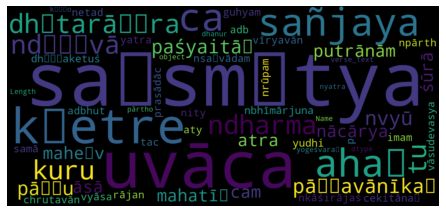

In [25]:
wordcloud = WordCloud(width=1300, height=600, stopwords=stopwords).generate(str(data))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
